## Build a Wflow model from scratch

This notebook demonstrates how to prepare **Wflow** model from scratch using the command line interace (CLI).

All lines in this notebook which start with `!` are executed from the command line. Within the notebook environment the logging messages are shown after completion. You can also copy these lines and paste these in your shell to get more direct feedback.

### HydroMT CLI build interface

Lets first check if the Wflow model is recognized by HydroMT

# SELECT CORRECT Kernal

In [7]:
import hydromt
!hydromt --models

Model plugins:
	- model (hydromt 1.3.0rc5)
	- example_model (hydromt 1.3.0rc5)
	- wflow_sbm (hydromt_wflow 1.0.0.dev0)
	- wflow_sediment (hydromt_wflow 1.0.0.dev0)


In [8]:
!hydromt --models

Model plugins:
	- model (hydromt 1.3.0rc5)
	- example_model (hydromt 1.3.0rc5)
	- wflow_sbm (hydromt_wflow 1.0.0.dev0)
	- wflow_sediment (hydromt_wflow 1.0.0.dev0)


In [9]:
!hydromt build --help

Usage: hydromt build [OPTIONS] MODEL MODEL_ROOT

  Build models from scratch.

  Example usage: --------------

  To build a wflow model: hydromt build wflow_sbm /path/to/model_root -i
  /path/to/wflow_config.yml -d deltares_data -d /path/to/data_catalog.yml -v

  To build a sfincs model: hydromt build sfincs /path/to/model_root  -i
  /path/to/sfincs_config.yml -d /path/to/data_catalog.yml -v

Options:
  -i, --config PATH        Path to hydroMT configuration file, for the model
                           specific implementation.  [required]
  -d, --data TEXT          Path to local yaml data catalog file OR name of
                           predefined data catalog.
  --dd, --deltares-data    Flag: Shortcut to add the "deltares_data" catalog
  --fo, --force-overwrite  Flag: If provided overwrite existing model files
  --cache                  Flag: If provided cache tiled rasterdatasets
  -v, --verbose            Increase verbosity.
  -q, --quiet              Decrease verbosity.
  --hel

In [10]:
# !hydromt build wflow_sbm "./wflow_test_full"  -i wflow_build.yml -d artifact_data -vv

In [11]:
# this should return "wflow, wflow_sediment"
# as well as the generic HydroMT models "grid_model, lumped_model, network_model, (mesh_model)"
!hydromt --models

Model plugins:
	- model (hydromt 1.3.0rc5)
	- example_model (hydromt 1.3.0rc5)
	- wflow_sbm (hydromt_wflow 1.0.0.dev0)
	- wflow_sediment (hydromt_wflow 1.0.0.dev0)


Using the **HydroMT build** API we can setup a complete model from scratch. Let's get an overview of all the available options:

### Model setup configuration

The HydroMT configuration file (YAML) contains the model setup configuration and determines which methods are used to prepare the different components of a Wflow model and in which order and optionally sets non-default arguments for each method. This configuration is passed to HydroMT using `-i <path_to_config_file>`. We have prepared several example files which are available in the model repository [examples folder](https://github.com/Deltares/hydromt_wflow/tree/main/examples) and from the [docs (building a model)](https://deltares.github.io/hydromt_wflow/latest/user_guide/wflow_build). 

Each header (without indent) (e.g. `setup_basemaps:`) corresponds to a model method. All model methods are explained in the [docs (model components)](https://deltares.github.io/hydromt_wflow/latest/user_guide/wflow_model_setup.html). 

We will load the default wflow build configuration yaml file for inspection:

In [20]:
fn_config = "/data/shared/hydroMT_data/hydromt_dire_dawa/local_data_v1.yml"

with open(fn_config, "r") as f:
    txt = f.read()
print(txt)

meta:
  roots:
    - /data/shared/hydroMT_data/hydromt_dire_dawa/
    - .
  version: version
  name: name

Delta_DTM:
  data_type: RasterDataset
  driver:
    name: rasterio
    options:
      chunks:
        x: 3600
        y: 3600
  metadata:
    category: elevation
    crs: 4326
  uri: delta_DTM.tif
chelsa_v1.2:
  data_type: RasterDataset
  driver:
    name: rasterio
    options:
      chunks:
        x: 3600
        y: 3600
  metadata:
    category: meteo
    crs: 4326
    paper_doi: 10.1038/sdata.2017.122
    paper_ref: Karger et al. (2017)
    source_license: CC BY 4.0
    source_url: http://chelsa-climate.org/downloads/
    source_version: '1.2'
  uri: chelsa.tif
esa_worldcover_2021:
  data_type: RasterDataset
  driver:
    name: rasterio
    options:
      chunks:
        x: 3600
        y: 3600
  metadata:
    category: landuse
    crs: 4326
  uri: esa_worldcover_2021.tif
koppen_geiger:
  data_type: RasterDataset
  driver:
    name: rasterio
    options:
      chunks:
        

### Data for model setup

The `<...>_fn` arguments correspond to a data source from the `DataCatalog` which is based on a yml-file with references to the data paths/urls and how the data should be read. This file can be provided to hydromt using `-d <path_to_yml_file>`. 

By default, the pre-defined `artifact_data` catalog containing some example data for the Piave basin will be downloaded to `~/.hydromt_data/` which is also used for this example. An overview of the available example data is provided [here](https://deltares.github.io/hydromt/latest/user_guide/data_existing_cat.html)
This example data is a based on the data which is available from the Deltares p-drive. 
If you have acces to this drive, a pre-configured catalog file can be loaded using the `-d deltares_data` pre-defined catalog. 

More background how to write a data catalog yml file can be found in the [HydroMT core docs](https://deltares.github.io/hydromt/latest/user_guide/data_prepare_cat.html) 

### Setup complete Wflow model 

Once we have prepared our data catalog and model build settings file, we are ready to ask HydroMT to build our Wflow model. Building the model can be done from the command line. Down below is an example for the Northern part of the Piave basin in Italy:

In [ ]:
# NOTE: copy this line (without !) to your shell for more direct feedback
!hydromt build wflow "./wflow_model_output" -r "{'subbasin': [12.2051, 45.8331], 'strord': 4, 'bounds': [11.70, 45.35, 12.95, 46.70]}" -i wflow_build.yml -d artifact_data -vv

In [7]:
# NOTE: copy this line (without !) to your shell for more direct feedback
!hydromt build wflow_sbm "./wflow_test_full" -i wflow_build.yml -d artifact_data --fo -v

2025-11-19 13:20:29,388 - hydromt - log - INFO - HydroMT version: 1.3.0-rc5
2025-11-19 13:20:29,963 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Reading data catalog artifact_data latest
2025-11-19 13:20:29,963 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /home/test2/.hydromt/artifact_data/v1.0.0/data_catalog.yml
SHA256 hash of downloaded file: 32de5b95c171628547f303d7f65d53cbb1b9da9af4834717c8efff93fe55aad4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Untarring contents of '/home/test2/.hydromt/artifact_data/latest/data.tar.gz' to '/home/test2/.hydromt/artifact_data/latest'
2025-11-19 13:20:32,866 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-19 13:20:32,866 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_w

In [57]:
!hydromt build wflow_sbm "./dire_dawa_wflow_modelv2" -i ./model_build_files/dire_dawa_wflow_build.yml -d "./model_build_files/hydromt_dire_dawa.yml" -vv

2025-11-20 12:02:10,744 - hydromt - log - INFO - HydroMT version: 1.3.0-rc5
2025-11-20 12:02:10,869 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from ./model_build_files/hydromt_dire_dawa.yml
2025-11-20 12:02:10,904 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-20 12:02:10,904 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/parameters_data.yml
2025-11-20 12:02:10,919 - hydromt.hydromt_wflow.wflow_base - wflow_base - INFO - Supported Wflow.jl version v1+
2025-11-20 12:02:10,919 - hydromt.hydromt_wflow.components.config - config - INFO - Reading default config file from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/wflow_sbm/wflow_sbm.toml.
2025-11-20 12:02:10,920 - hydromt - log - INFO - HydroMT version: 1.3.0-rc5
2025-11-20 12:02:10,921 - hydromt.model.model - model - INFO - build: setup_config


With this example we build a complete Wflow model including forcing. The example means the following: run **hydromt build** with:

* `wflow` : i.e. build a Wflow model
* `./wflow_test_full` : output model folder
* `-r "{'subbasin': [12.2051, 45.8331], 'strord': 4, 'bounds': [11.70, 45.35, 12.95, 46.70]}"` : derive a subbasin with its outlet at the given x,y coordinates and within the given bounds [xmin, ymin, xmax, ymax] (WGS84) snapped to a river with minimum stream order (strord) of 4. All *REGION* options are described in the [docs](https://deltares.github.io/hydromt/latest/user_guide/model_region)
* `-i wflow_build.yml` : setup configuration file including all components to build and their arguments
* `-d artifact_data`: data catalog to use. Here `artifact_data` which contains a global data extract for Northern Italy for demo purposes.
* `-vv` : give some extra verbosity (2 * v) to display feedback on screen. Now debug messages are provided.


Next we check which files have been created. The model root should contain two netcdf (.nc) files, one for the staticmaps and one for the forcing data, a wflow run configuration (.toml) file. These files are sufficient to run the wflow model. In addition several geometry (.geojson) files are saved in the *staticgeoms* folder.  Finally, the setup process is logged in the hydromt.log file. 

In [58]:
import os

root = "dire_dawa_wflow_modelv2"
for path, _, files in os.walk(root):
    print(path)
    for name in files:
        if name.endswith(".xml"):
            continue
        print(f" - {name}")

dire_dawa_wflow_modelv2
 - staticmaps.nc
 - wflow_sbm.toml
 - hydromt.log
 - hydromt_data.yml
dire_dawa_wflow_modelv2/staticgeoms
 - outlets.geojson
 - basins_highres.geojson
 - region.geojson
 - rivers.geojson
 - basins.geojson


### Visualize and/or inspect model schematization

In [ ]:
# Plot Forcing

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import hydromt
import hydromt_wflow

In [41]:
hydromt_wflow.WflowSbmModel

hydromt_wflow.wflow_sbm.WflowSbmModel

In [59]:
model_directory = './dire_dawa_wflow_modelv2'

model = hydromt_wflow.WflowSbmModel(model_directory, mode="r")

2025-11-20 12:07:02,660 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-20 12:07:02,662 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/parameters_data.yml
2025-11-20 12:07:02,680 - hydromt.hydromt_wflow.wflow_base - wflow_base - INFO - Supported Wflow.jl version v1+
2025-11-20 12:07:02,681 - hydromt.hydromt_wflow.components.config - config - INFO - Reading model config file from /home/test2/Capacity-Building-ICPAC-for-climate-services/2_IBF_Flood_Damage/dire_dawa_wflow_modelv2/wflow_sbm.toml.


In [60]:
# model.forcing.data.precip.isel(time=5).plot()

In [61]:
# ds_forcing = model.forcing.data
# ds_forcing = ds_forcing.mean(dim=[ds_forcing.raster.x_dim, ds_forcing.raster.y_dim])

In [62]:
# plot axes labels
_ATTRS = {
    "precip": {
        "standard_name": "precipitation",
        "unit": "mm.day-1",
        "color": "darkblue",
    },
    "pet": {
        "standard_name": "potential evapotranspiration",
        "unit": "mm.day-1",
        "color": "purple",
    },
    "temp": {"standard_name": "temperature", "unit": "degree C", "color": "orange"},
}

In [63]:
# n = len(ds_forcing.data_vars)
# kwargs0 = dict(sharex=True, figsize=(6, n * 3))

# fig, axes = plt.subplots(n, 1, **kwargs0)
# axes = [axes] if n == 1 else axes
# for i, name in enumerate(ds_forcing.data_vars):
#     df = ds_forcing[name].squeeze().to_series()
#     attrs = _ATTRS[name]
#     longname = attrs.get("standard_name", "")
#     unit = attrs.get("unit", "")
#     if name == "precip":
#         axes[i].bar(df.index, df.values, facecolor=attrs["color"])
#     else:
#         df.plot.line(ax=axes[i], x="time", color=attrs["color"])
#     axes[i].set_title(longname)
#     axes[i].set_ylabel(f"{longname}\n[{unit}]")

# # save figure
# # fn_out = join(mod.root, "figs", "forcing.png")
# # plt.savefig(fn_out, dpi=225, bbox_inches="tight")

In [69]:


import xarray as xr
import numpy as np
import hydromt
from hydromt_wflow import WflowSbmModel



In [70]:


# Plotting dependencies
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



In [71]:
model.staticmaps.data

<xarray.Dataset> Size: 599kB
Dimensions:                                    (latitude: 40, longitude: 51,
                                                flood_depth: 8, time: 12,
                                                layer: 4)
Coordinates:
  * latitude                                   (latitude) float64 320B 9.771 ...
  * longitude                                  (longitude) float64 408B 41.69...
  * flood_depth                                (flood_depth) float64 64B 0.5 ...
  * time                                       (time) int64 96B 1 2 3 ... 11 12
  * layer                                      (layer) int64 32B 0 1 2 3
    spatial_ref                                int64 8B 0
Data variables: (12/48)
    meta_subgrid_outlet_x                      (latitude, longitude) float64 16kB ...
    meta_subgrid_outlet_y                      (latitude, longitude) float64 16kB ...
    local_drain_direction                      (latitude, longitude) uint8 2kB ...
    subcatchment                               (latitude, longitude) int32 8kB ...
    meta_upstream_area                         (latitude, longitude) float32 8kB ...
    meta_subgrid_area                          (latitude, longitude) float32 8kB ...
    ...                                         ...
    meta_soilgrids_2020_ksat_vertical_80.0cm   (latitude, longitude) float32 8kB ...
    meta_soilgrids_2020_ksat_vertical_150.0cm  (latitude, longitude) float32 8kB ...
    soil_f_                                    (latitude, longitude) float32 8kB ...
    soil_f                                     (latitude, longitude) float32 8kB ...
    meta_soil_texture                          (latitude, longitude) int32 8kB ...
    outlets                                    (latitude, longitude) int32 8kB ...

# toevoegen try other layers!!!

In [72]:


# read and mask the model elevation
da = model.staticmaps.data["land_elevation"].raster.mask_nodata()
da.attrs.update(long_name="elevation", units="m")
# read/derive river geometries
gdf_riv = model.rivers
# read/derive model basin boundary
gdf_bas = model.basins



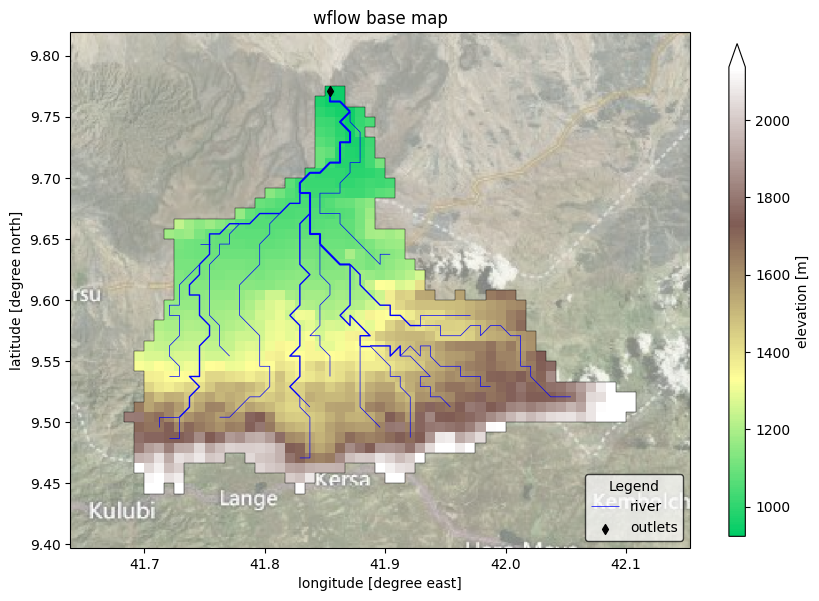

In [73]:
# we assume the model maps are in the geographic CRS EPSG:4326
proj = ccrs.PlateCarree()
# adjust zoomlevel and figure size to your basis size & aspect
zoom_level = 10
figsize = (10, 8)
shaded = False  # shaded elevation (looks nicer with more pixels (e.g.: larger basins))!

# initialize image with geoaxes
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(projection=proj)
bbox = da.raster.box.to_crs(3857).buffer(5e3).to_crs(da.raster.crs).total_bounds
extent = np.array(bbox)[[0, 2, 1, 3]]
ax.set_extent(extent, crs=proj)

# add sat background image
ax.add_image(cimgt.QuadtreeTiles(), zoom_level, alpha=0.5)

## plot elevation\
# create nice colormap
vmin, vmax = da.quantile([0.0, 0.98]).compute()
c_dem = plt.cm.terrain(np.linspace(0.25, 1, 256))
cmap = colors.LinearSegmentedColormap.from_list("dem", c_dem)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
kwargs = dict(cmap=cmap, norm=norm)
# plot 'normal' elevation
da.plot(
    transform=proj, ax=ax, zorder=1, cbar_kwargs=dict(aspect=30, shrink=0.8), **kwargs
)
# plot elevation with shades
if shaded:
    ls = colors.LightSource(azdeg=315, altdeg=45)
    dx, dy = da.raster.res
    _rgb = ls.shade(
        da.fillna(0).values,
        norm=kwargs["norm"],
        cmap=kwargs["cmap"],
        blend_mode="soft",
        dx=dx,
        dy=dy,
        vert_exag=200,
    )
    rgb = xr.DataArray(dims=("y", "x", "rgb"), data=_rgb, coords=da.raster.coords)
    rgb = xr.where(np.isnan(da), np.nan, rgb)
    rgb.plot.imshow(transform=proj, ax=ax, zorder=2)

# plot rivers with increasing width with stream order
gdf_riv.plot(
    ax=ax, linewidth=gdf_riv["strord"] / 2, color="blue", zorder=3, label="river"
)
# plot the basin boundary
gdf_bas.boundary.plot(ax=ax, color="k", linewidth=0.3)
# plot various vector layers if present
if "outlets" in model.geoms.data:
    model.geoms.data["outlets"].plot(
        ax=ax, marker="d", markersize=25, facecolor="k", zorder=5, label="outlets"
    )
patches = []  # manual patches for legend, see https://github.com/geopandas/geopandas/issues/660
if "meta_reservoirs_no_control" in model.geoms.data:
    kwargs = dict(facecolor="lightblue", edgecolor="black", linewidth=1, label="reservoirs (natural lakes)")
    model.geoms.data["meta_reservoirs_no_control"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))
if "meta_reservoirs_simple_control" in model.geoms.data:
    kwargs = dict(facecolor="blue", edgecolor="black", linewidth=1, label="reservoirs (simple control)")
    model.geoms.data["meta_reservoirs_simple_control"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))
if "glaciers" in model.geoms.data:
    kwargs = dict(facecolor="grey", edgecolor="grey", linewidth=1, label="glaciers")
    model.geoms.data["glaciers"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.set_ylabel(f"latitude [degree north]")
ax.set_xlabel(f"longitude [degree east]")
_ = ax.set_title(f"wflow base map")
legend = ax.legend(
    handles=[*ax.get_legend_handles_labels()[0], *patches],
    title="Legend",
    loc="lower right",
    frameon=True,
    framealpha=0.7,
    edgecolor="k",
    facecolor="white",
)

# save figure
# NOTE create figs folder in model root if it does not exist
# fn_out = join(mod.root, "figs", "basemap.png")
# plt.savefig(fn_out, dpi=225, bbox_inches="tight")



In [74]:
!julia -e 'using Wflow; Wflow.run("dire_dawa_wflow_modelv2/wflow_sbm.toml")'

ERROR: ArgumentError: Couldn't parse the [input] section in the TOML with data Dict{String, Any}("river_location__mask" => "river_mask", "static" => Dict{String, Any}("soil__thickness" => "soil_thickness", "vegetation_root__feddes_critical_pressure_head_h3_high" => "vegetation_feddes_h3_high", "soil_water__saturated_volume_fraction" => "soil_theta_s", "compacted_soil_surface_water__infiltration_capacity" => Dict{String, Any}("value" => 5), "soil_water_saturated_zone_bottom__max_leakage_volume_flux" => Dict{String, Any}("value" => 0), "snowpack__melting_temperature_threshold" => Dict{String, Any}("value" => 0), "river__width" => "river_width", "soil_layer_water__brooks_corey_exponent" => "soil_brooks_corey_c", "vegetation_canopy__light_extinction_coefficient" => "vegetation_kext", "soil_wet_root__sigmoid_function_shape_parameter" => Dict{String, Any}("value" => -500), "land_surface_water_flow__manning_n_parameter" => "land_manning_n", "compacted_soil__area_fraction" => "soil_compacted_f

### Visualize and/or inspect model schematization

* The **wflow plot** example notebook contains scripts to visualize your model
* The **wflow nc to raster files** example notebook contains scripts to write the nc model files to a netcdf which can be used to inspect (and modify) the model layers in e.g. QGIS.